# Preproccessing Data

### Import Dataset

In [56]:
import matplotlib.pyplot as plt 
import numpy as np
from nltk.tokenize import word_tokenize
import re
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS

In [27]:
df = pd.read_csv("reviews.csv")

df.head(5)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [28]:
df.Rating.value_counts()

Rating
5    22095
1    17653
4     7842
2     7118
3     6886
Name: count, dtype: int64

### Feature Selection

In [29]:
df.drop(columns=["Time_submitted", "Total_thumbsup", "Reply"], inplace=True)

df.head()

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [30]:
df = df[(df.Rating == 1) | (df.Rating == 5)]

df.head()

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
6,I love the selection and the lyrics are provid...,5


In [31]:
labels = [0 if rate == 1 else 1 for rate in df.Rating]
df["Labels"] = labels

df.head()

,Review,Rating,Labels
0,"Great music service, the audio is high quality...",5,1
1,Please ignore previous negative rating. This a...,5,1
3,Really buggy and terrible to use as of recently,1,0
4,Dear Spotify why do I get songs that I didn't ...,1,0
6,I love the selection and the lyrics are provid...,5,1


In [34]:
df = pd.concat([df[df.Labels == 0].iloc[:3000], df[df.Labels == 1].iloc[:3000]]).sample(frac=1, random_state=42).reset_index(drop=True)

df

,Review,Rating,Labels
0,Recently the app has gotten really buggy - ran...,1,0
1,This is very helpful when it comes to finding ...,5,1
2,I can't open the app. It's stuck on the start-...,1,0
3,This apps is not Good I cant disconnect to mon...,1,0
4,Like the plaY lists they set up for me based o...,5,1
...,...,...,...
5995,I love this app this is useful app and especia...,5,1
5996,It is the best song app,5,1
5997,"It has been working really well for me, you ca...",5,1
5998,I like Spotify even more now that there's lyri...,5,1


### Duplicated Data

In [36]:
df[df.duplicated()]

,Review,Rating,Labels
192,Too many ads,1,0
760,Too many ads,1,0
1150,Too many ads,1,0
1288,Best music app by far,5,1
1635,Too many ads,1,0
1942,The best music app ever,5,1
2047,Too many adds,1,0
2475,Best music experience ever,5,1
2553,Too much ads,1,0
2603,Too many ads,1,0


In [38]:
df.drop_duplicates(inplace=True)

df[df.duplicated()]

,Review,Rating,Labels


### Missing Value

In [39]:
df.isna().sum()

Review    0
Rating    0
Labels    0
dtype: int64

In [40]:
df.isnull().sum()

Review    0
Rating    0
Labels    0
dtype: int64

### Train Test Split

In [41]:
def Train_Test_Split(x, y, test_size=0.2, random_seed=None):
    n = len(x)
    if random_seed:
        np.random.seed(random_seed)

    test_size = int(test_size*n)
    indices = np.random.permutation(n)
    train_indices, test_indices = indices[test_size:], indices[:test_size]
    return x.iloc[train_indices], x.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

X_train, X_test, y_train, y_test = Train_Test_Split(df.Review, df.Labels, test_size=0.2, random_seed=42)

In [42]:
X_train

4574    I play a song that i want and it plays somethi...
1886    Just a cash grab at this point, they stopped g...
2846    The first few days it was a great app where I ...
4111    Can't disable Auto start when Bluetooth connec...
1176    I truly love listening to all of my playlists ...
                              ...                        
3786                                  ads more than songs
5213    So far so good. It's been amazing working with...
5248    ABSOLUTE TRASH ON MOBILE. All I wanted to do w...
5412    Honestly it's the worst music app that I've ev...
862                         Good app for listening music.
Name: Review, Length: 4780, dtype: object

### Case Folding

In [43]:
def case_folding(text):
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"RT[\s]+", "", text)
    text = re.sub(r"https?://\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))

    return text

X_train = X_train.apply(case_folding).str.lower()

X_train.head()

4574    i play a song that i want and it plays somethi...
1886    just a cash grab at this point they stopped gi...
2846    the first few days it was a great app where i ...
4111    cant disable auto start when bluetooth connect...
1176    i truly love listening to all of my playlists ...
Name: Review, dtype: object

In [47]:
X_train[32], y_train[32]

('pretty good but id like it better if they had more songs there are some original songs which i cant find here still i use it a lot and love it nonetheless 😌',
 1)

### Tokenized

In [48]:
tokenized = X_train.apply(lambda x: word_tokenize(x))

tokenized.head(7)

4574    [i, play, a, song, that, i, want, and, it, pla...
1886    [just, a, cash, grab, at, this, point, they, s...
2846    [the, first, few, days, it, was, a, great, app...
4111    [cant, disable, auto, start, when, bluetooth, ...
1176    [i, truly, love, listening, to, all, of, my, p...
5775    [not, only, does, spotify, glitch, it, also, s...
4536    [i, really, like, it, easy, to, use, and, cust...
Name: Review, dtype: object

### Stopwords

In [49]:
stops = set(stopwords.words('english'))

tokenized = tokenized.apply(lambda text: [word for word in text if word not in stops])

tokenized.head(10)


4574    [play, song, want, plays, something, else, dis...
1886    [cash, grab, point, stopped, giving, minutes, ...
2846    [first, days, great, app, could, listen, music...
4111    [cant, disable, auto, start, bluetooth, connec...
1176    [truly, love, listening, playlists, app, disli...
5775    [spotify, glitch, also, shuts, apps, 😐, even, ...
4536                 [really, like, easy, use, customize]
946     [app, broken, newest, update, spoke, tebro, z,...
5365                    [seriously, best, variety, music]
4262    [amazing, thank, spotify, great, music, old, n...
Name: Review, dtype: object

### Stemming

In [50]:
stemmer = PorterStemmer()

tokenized = tokenized.apply(lambda text: [stemmer.stem(token) for token in text])

tokenized.head()

4574    [play, song, want, play, someth, els, disabl, ...
1886    [cash, grab, point, stop, give, minut, uninter...
2846    [first, day, great, app, could, listen, music,...
4111    [cant, disabl, auto, start, bluetooth, connect...
1176    [truli, love, listen, playlist, app, dislik, a...
Name: Review, dtype: object

In [55]:
tokenized[3]

['app', 'good', 'cant', 'disconnect', 'monthli', 'subscript', '😡']

# Pembobotan Kata

### Analisis Melalui wordcloud

In [70]:
labeled_data = pd.DataFrame(tokenized)
labeled_data["Labels"] = y_train.to_list()

labeled_data.head()

,Review,Labels
4574,"[play, song, want, play, someth, els, disabl, ...",0
1886,"[cash, grab, point, stop, give, minut, uninter...",0
2846,"[first, day, great, app, could, listen, music,...",0
4111,"[cant, disabl, auto, start, bluetooth, connect...",0
1176,"[truli, love, listen, playlist, app, dislik, a...",1


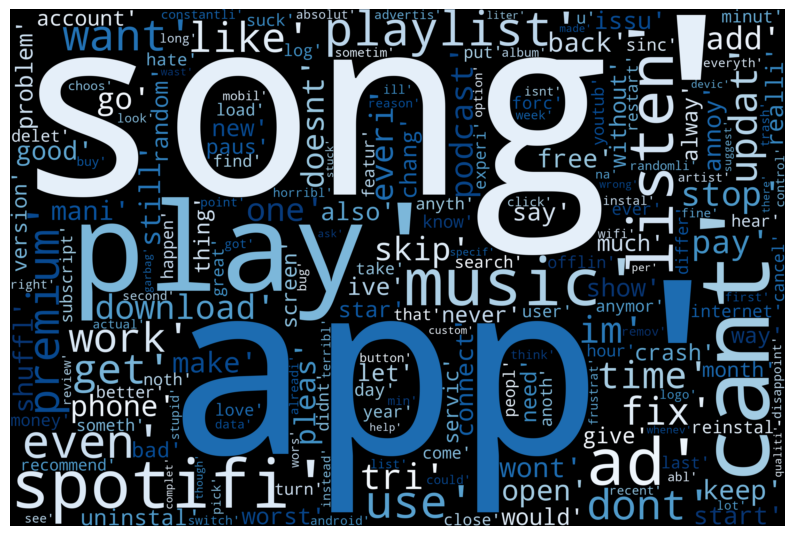

In [73]:
def plot_cloud(word_cloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_word = ''.join([str(word) for word in labeled_data.Review[labeled_data.Labels == 0]])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap="Blues_r",
    collocations=False,
    stopwords=STOPWORDS
).generate(all_word)

plot_cloud(wordcloud)

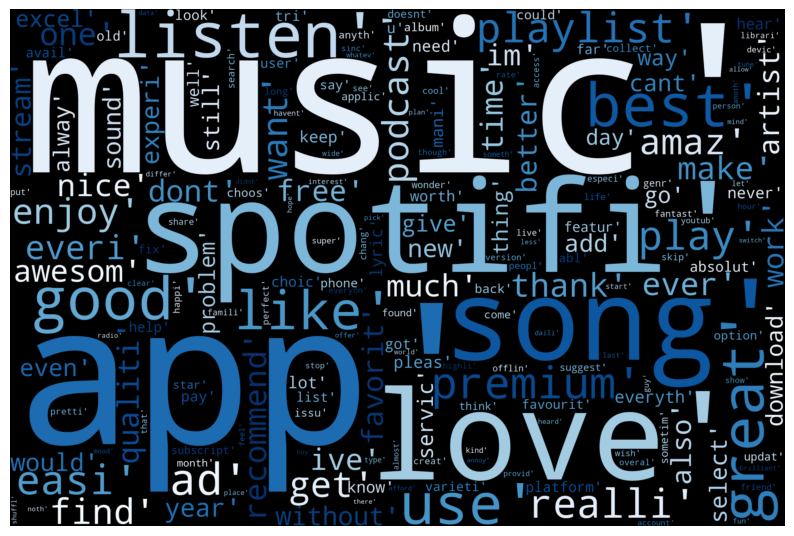

In [74]:
def plot_cloud(word_cloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_word = ''.join([str(word) for word in labeled_data.Review[labeled_data.Labels == 1]])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap="Blues_r",
    collocations=False,
    stopwords=STOPWORDS
).generate(all_word)

plot_cloud(wordcloud)

### Frequency of Word

### Term Frequncy

### Inverse Document Frequency

### TF-IDF

# Modeling dan Testing

### Pembuatan class

### Training

### Testing

### Conclusion